In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import winsound

Using TensorFlow backend.


In [2]:
df = pd.read_csv('dataset.csv')
del df['Unnamed: 0']

In [3]:
df

,date,number,name,div,a
0,2008-01-01,150.0,서울역(150),승차,234.0
1,2008-01-01,150.0,서울역(150),승차,-420.0
2,2008-01-01,150.0,서울역(150),승차,-318.0
3,2008-01-01,150.0,서울역(150),승차,-161.0
4,2008-01-01,150.0,서울역(150),승차,-205.0
5,2008-01-01,150.0,서울역(150),승차,13.0
6,2008-01-01,150.0,서울역(150),승차,538.0
7,2008-01-01,150.0,서울역(150),승차,632.0
8,2008-01-01,150.0,서울역(150),승차,604.0
9,2008-01-01,150.0,서울역(150),승차,808.0


In [4]:
df.columns

Index(['date', 'number', 'name', 'div', 'a'], dtype='object')

In [5]:
df['name']

0           서울역(150)
1           서울역(150)
2           서울역(150)
3           서울역(150)
4           서울역(150)
5           서울역(150)
6           서울역(150)
7           서울역(150)
8           서울역(150)
9           서울역(150)
10          서울역(150)
11          서울역(150)
12          서울역(150)
13          서울역(150)
14          서울역(150)
15          서울역(150)
16          서울역(150)
17          서울역(150)
18          서울역(150)
19          서울역(150)
20           시청(151)
21           시청(151)
22           시청(151)
23           시청(151)
24           시청(151)
25           시청(151)
26           시청(151)
27           시청(151)
28           시청(151)
29           시청(151)
              ...   
19220330          수진
19220331          수진
19220332          수진
19220333          수진
19220334          수진
19220335          수진
19220336          수진
19220337          수진
19220338          수진
19220339          수진
19220340       모란(8)
19220341       모란(8)
19220342       모란(8)
19220343       모란(8)
19220344       모란(8)
19220345       모란(8)
19220346     

In [6]:
s = df['name']
s

0           서울역(150)
1           서울역(150)
2           서울역(150)
3           서울역(150)
4           서울역(150)
5           서울역(150)
6           서울역(150)
7           서울역(150)
8           서울역(150)
9           서울역(150)
10          서울역(150)
11          서울역(150)
12          서울역(150)
13          서울역(150)
14          서울역(150)
15          서울역(150)
16          서울역(150)
17          서울역(150)
18          서울역(150)
19          서울역(150)
20           시청(151)
21           시청(151)
22           시청(151)
23           시청(151)
24           시청(151)
25           시청(151)
26           시청(151)
27           시청(151)
28           시청(151)
29           시청(151)
              ...   
19220330          수진
19220331          수진
19220332          수진
19220333          수진
19220334          수진
19220335          수진
19220336          수진
19220337          수진
19220338          수진
19220339          수진
19220340       모란(8)
19220341       모란(8)
19220342       모란(8)
19220343       모란(8)
19220344       모란(8)
19220345       모란(8)
19220346     

In [7]:
s = list(set(s))
s

['시청(201)',
 '압구정(326)',
 '영등포구청(236)',
 '매봉(333)',
 '옥수(325)',
 '대흥',
 '역삼(221)',
 '보라매',
 '신대방(231)',
 '종로3가(319)',
 '잠실(216)',
 '한성대입구(419)',
 '명동(424)',
 '동묘앞(6)',
 '수진',
 '종각(152)',
 '장한평',
 '용마산',
 '대청(337)',
 '구파발(310)',
 '청구(6)',
 '봉천(229)',
 '종합운동장(218)',
 '발산',
 '잠실(8)',
 '혜화(420)',
 '공덕(6)',
 '강동구청',
 '가락시장(8)',
 '문정',
 '중곡',
 '서울역(150)',
 '굴포천',
 '금호(324)',
 '교대(330)',
 '여의나루',
 '상봉(7)',
 '상도',
 '까치울',
 '신풍',
 '동대문운동장(205)',
 '남부터미널(331)',
 '양재(332)',
 '미아사거리(416)',
 '대림(233)',
 '삼성(219)',
 '가산디지털단지(7)',
 '신중동',
 '안암',
 '약수(6)',
 '수락산',
 '양천구청(248)',
 '신용산(429)',
 '신정네거리(249)',
 '창동(412)',
 '도봉산(7)',
 '망원',
 '둔촌동',
 '강변(214)',
 '마포',
 '광흥창',
 '새절',
 '부평구청(7)',
 '마포구청',
 '서대문',
 '서울역(426)',
 '마천',
 '건대입구(212)',
 '보문(6)',
 '송정',
 '용답(244)',
 '을지로입구(202)',
 '잠원(328)',
 '청구(5)',
 '행당',
 '목동',
 '미아(415)',
 '올림픽공원',
 '동대문운동장(422)',
 '단대오거리',
 '신설동(156)',
 '방화',
 '남구로',
 '서초(224)',
 '동대문역사문화공원5',
 '합정(238)',
 '대림(7)',
 '교대(223)',
 '양평(5)',
 '잠실새내(217)',
 '홍대입구(239)',
 '신당(206)',
 

In [8]:
len(s)

284

In [9]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data) - look_back):
        dataX.append(signal_data[i:(i + look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 7

In [10]:
s[1]

'압구정(326)'

In [11]:
# for i in range(len(s)):
#     print(s[i] ,':', len(df[df['name']==s[i]]))

In [12]:
20226480 - 19220360 # 71220 * 284 - rows

1006120

In [14]:
data1 = df[df['name']=='강남(222)']
data1

,date,number,name,div,a
620,2008-01-01,222.0,강남(222),승차,945.0
621,2008-01-01,222.0,강남(222),승차,314.0
622,2008-01-01,222.0,강남(222),승차,-64.0
623,2008-01-01,222.0,강남(222),승차,-205.0
624,2008-01-01,222.0,강남(222),승차,-806.0
625,2008-01-01,222.0,강남(222),승차,-405.0
626,2008-01-01,222.0,강남(222),승차,-336.0
627,2008-01-01,222.0,강남(222),승차,-474.0
628,2008-01-01,222.0,강남(222),승차,-628.0
629,2008-01-01,222.0,강남(222),승차,-584.0


In [15]:
name = data1.iloc[:1,2,]
name

620    강남(222)
Name: name, dtype: object

In [16]:
name = name.to_string(index=False)

In [17]:
name

' 강남(222)'

In [18]:
plt.savefig(name)

<Figure size 432x288 with 0 Axes>

In [19]:
len(data1)

71220

In [20]:
data1.shape

(71220, 5)

In [21]:
data1 = df[df['name']=='강남(222)']
print(data1)
data = data1['a']
#     data = data.value
data = data.values.astype('float32')
data = data.reshape(len(data), 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.80)
test_size = len(data) - train_size

train = data[0:train_size]
test = data[train_size:len(data)]
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# 모델 구성하기

model = Sequential()
model.add(LSTM(512, input_shape=(None, 1), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(512, input_shape=(None, 1)))
model.add(Dropout(0.3))
# model.add(LSTM(i, input_shape=(None, 1)))

# model.add(Dense(i))
# model.add(Dropout(0.3))
# model.add(Dropout(0.3))
# model.add(Dense(64))

model.add(Dense(1))
name = "tt.jpg"
# 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
model.summary()
hist = model.fit(x_train, y_train, epochs=10, batch_size=64)
p = model.predict(x_test)

plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.savefig(datetime.datetime.now())
plt.savefig(name)
plt.clf()
print(mean_squared_error(y_test, p))

                date  number     name div        a
620       2008-01-01   222.0  강남(222)  승차    945.0
621       2008-01-01   222.0  강남(222)  승차    314.0
622       2008-01-01   222.0  강남(222)  승차    -64.0
623       2008-01-01   222.0  강남(222)  승차   -205.0
624       2008-01-01   222.0  강남(222)  승차   -806.0
625       2008-01-01   222.0  강남(222)  승차   -405.0
626       2008-01-01   222.0  강남(222)  승차   -336.0
627       2008-01-01   222.0  강남(222)  승차   -474.0
628       2008-01-01   222.0  강남(222)  승차   -628.0
629       2008-01-01   222.0  강남(222)  승차   -584.0
630       2008-01-01   222.0  강남(222)  승차   -661.0
631       2008-01-01   222.0  강남(222)  승차   -751.0
632       2008-01-01   222.0  강남(222)  승차   -839.0
633       2008-01-01   222.0  강남(222)  승차   -723.0
634       2008-01-01   222.0  강남(222)  승차   -198.0
635       2008-01-01   222.0  강남(222)  승차    800.0
636       2008-01-01   222.0  강남(222)  승차   1650.0
637       2008-01-01   222.0  강남(222)  승차   1725.0
638       2008-01-01   222.0  강

<Figure size 432x288 with 0 Axes>

In [22]:
# # Plot training & validation loss values
# plt.plot(hist.history['loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

Text(0.5, 0, 'Time')

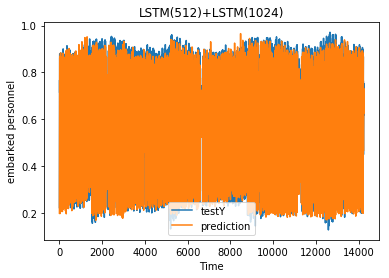

In [23]:
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'prediction'], loc='best')
plt.title('LSTM(512)+LSTM(1024)')
plt.ylabel('embarked personnel')
plt.xlabel('Time')

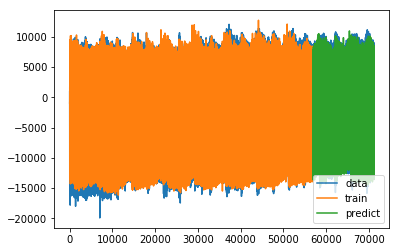

In [24]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])

# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(data)+2, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['data', 'train','predict'], loc='best')
plt.show()

In [35]:
print(y_train.shape)
print(y_test.shape)

(45575, 1)
(11394, 1)


In [32]:
yhat = y_test
yhat.reshape()

(11394, 1)

In [31]:
y = model.predict(y_test)
y

ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (11394, 1)

In [26]:
# x = range(0,len(y))
x = np.arange(0, len(y))
x=x.reshape(len(x),1)

In [27]:
print(len(x))
print(len(y))
print(x.shape)
print(y.shape)
print(type(y))
print(type(x))

56969
56969
(56969, 1)
(56969, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [28]:
x=x.reshape(len(x),1)
x.shape

(56969, 1)

In [29]:
data = y

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

XGBModel = XGBRegressor()
XGBModel.fit(x_train,y_train, verbose=False)

p = XGBModel.predict(x_test)
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))

plt.show()
print(mean_squared_error(y_test, p))

NameError: name 'XGBRegressor' is not defined

In [ ]:
plt.plot(x_train)
plt.plot(y_train)
plt.show()

In [ ]:
plt.plot(x_train)

In [ ]:
plt.plot(y_train)

In [ ]:
plt.plot(p)

In [ ]:
from xgboost import XGBRegressor
# import xgboost as xgb
# from xgboost.sklearn import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(x,y, verbose=False)

# Get the mean absolute error on the validation data :
# XGBpredictions = XGBModel.predict(val_X)
# MAE = mean_absolute_error(val_y , XGBpredictions)
# print('XGBoost validation MAE = ',MAE)

In [ ]:
from xgboost import plot_tree
plot_tree(XGBModel)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x,y)

# Get the mean absolute error on the validation data
predicted_prices = model.predict(val_X)
MAE = mean_absolute_error(val_y , predicted_prices)
print('Random forest validation MAE = ', MAE)

In [ ]:
# 저장
model_json = model.to_json()
with open("s[0].json", "w") as json_file :
    json_file.write(model_json)
model.save_weights("s[0].h5")
print("Saved model to disk")

In [ ]:
# # 모델 불러오기
# from keras.models import model_from_json
# json_file = open("model1.json", "r")
# model_json = json_file.read()
# json_file.close()
# model = model_from_json(loaded_model_json)
# model.load_weights("model1.h5")
# model.compile(loss="mean_squared_error", optimizer="rmsprop", metrics=['accuracy'])

In [ ]:
from keras.utils import plot_model
plot_model(loaded_model, to_file='model.png')
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(loaded_model).create(prog='dot', format='svg'))
plot_model(loaded_model, to_file='model_plot.png')

In [ ]:
SVG(model_to_dot(loaded_model).create(prog='dot', format='svg'))

In [ ]:
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.savefig(datetime.datetime.now())
plt.show()
print(mean_squared_error(y_test, p))

In [ ]:
p = model.predict(x_test)

plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.savefig(datetime.datetime.now())
plt.savefig(name)
plt.show()
print(mean_squared_error(y_test, p))

In [ ]:
data = y # p
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
x = np.arange(0, len(y))
x=x.reshape(len(x),1)
x = scaler.fit_transform(x)

train_size = int(len(data) * 0.80)
test_size = len(data) - train_size

y_train = data[0:train_size]
y_test = data[train_size:len(data)]
x_train = x[0:train_size]
x_test = x[train_size:len(x)]
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

XGBModel = XGBRegressor()
XGBModel.fit(x_train,y_train, verbose=False)

p = XGBModel.predict(x_test)
plt.plot(y_test)
plt.plot(p)
plt.legend(['y_test', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))

plt.show()
print(mean_squared_error(y_test, p))

In [ ]:
plt.plot(p)

In [ ]:
plt.plot(y_test)